# Hand Gesture Recoginition
<a href="https://www.kaggle.com/datasets/gti-upm/leapgestrecog">Dataset Link</a>

In [31]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import os
import random
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


import cv2
import keras
from keras.layers import Conv2D, Activation, MaxPool2D, Dense, Flatten, Dropout

In [14]:
CATEGORIES = ["01_palm", '02_l','03_fist','04_fist_moved','05_thumb','06_index','07_ok','08_palm_moved','09_c','10_down']
IMG_SIZE = 50
data_path = "leapGestRecog"

# Loading Data

In [15]:
image_data = []
for dr in os.listdir(data_path):
    for category in CATEGORIES:
        class_index = CATEGORIES.index(category)
        path = os.path.join(data_path, dr, category)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                image_data.append([cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE)), class_index])
            except Exception as e:
                pass
image_data[0]

[array([[5, 4, 4, ..., 3, 4, 2],
        [5, 4, 5, ..., 3, 3, 3],
        [4, 5, 4, ..., 4, 5, 3],
        ...,
        [4, 5, 5, ..., 5, 5, 5],
        [5, 5, 6, ..., 5, 7, 4],
        [4, 7, 5, ..., 5, 4, 4]], dtype=uint8),
 0]

In [16]:
random.shuffle(image_data)

In [17]:
input_data = []
label = []
for X, y in image_data:
    input_data.append(X)
    label.append(y)

# Image Visualization

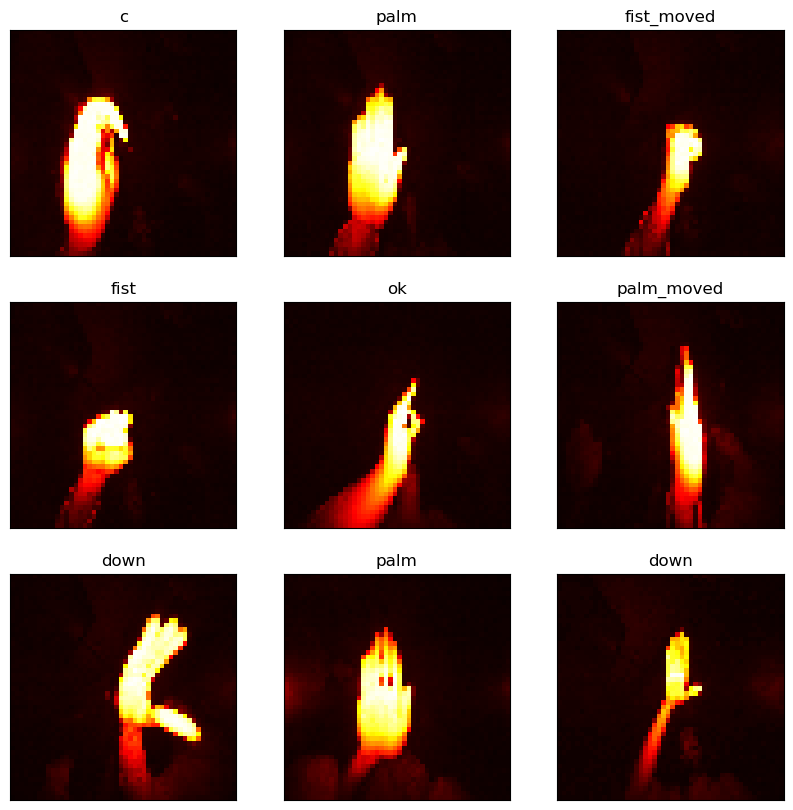

In [18]:
plt.figure(1, figsize=(10,10))
for i in range(1,10):
    plt.subplot(3,3,i)
    plt.imshow(image_data[i][0], cmap='hot')
    plt.xticks([])
    plt.yticks([])
    plt.title(CATEGORIES[label[i]][3:])
plt.show()

# Data Normalization

In [19]:
input_data = np.array(input_data)
label = np.array(label)
input_data = input_data/255.0
input_data.shape

(20000, 50, 50)

In [20]:
# one hot encoding
label = keras.utils.to_categorical(label, num_classes=10,dtype='i1')
label[0]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int8)

In [21]:
# reshaping the data
input_data.shape = (-1, IMG_SIZE, IMG_SIZE, 1)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(input_data, label, test_size = 0.3, random_state=42)

# Model Training

In [23]:
model = keras.models.Sequential()
#First Conv1D layer
model.add(Conv2D(filters = 32, kernel_size = (3,3), input_shape = (IMG_SIZE, IMG_SIZE, 1)))
model.add(Activation('relu'))

#Second Conv1D layer
model.add(Conv2D(filters = 32, kernel_size = (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

#Third Conv1D layer
model.add(Conv2D(filters = 64, kernel_size = (3,3)))
model.add(Activation('relu'))

model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

#Flatten layer
model.add(Flatten())

#Dense layer 1
model.add(Dense(256, activation='relu'))

#Final layer of 10 nodes
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer = 'rmsprop',
             metrics = ['accuracy'])

In [24]:
model.fit(X_train, y_train, epochs = 5, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/5
438/438 [==============================] - 72s 162ms/step - loss: 0.3453 - accuracy: 0.8873 - val_loss: 0.0086 - val_accuracy: 0.9980
Epoch 2/5
438/438 [==============================] - 69s 157ms/step - loss: 0.0190 - accuracy: 0.9941 - val_loss: 0.0090 - val_accuracy: 0.9973
Epoch 3/5
438/438 [==============================] - 76s 173ms/step - loss: 0.0092 - accuracy: 0.9971 - val_loss: 0.0035 - val_accuracy: 0.9990
Epoch 4/5
438/438 [==============================] - 83s 189ms/step - loss: 0.0071 - accuracy: 0.9981 - val_loss: 0.0018 - val_accuracy: 0.9995
Epoch 5/5
438/438 [==============================] - 97s 221ms/step - loss: 0.0017 - accuracy: 0.9994 - val_loss: 8.7103e-04 - val_accuracy: 0.9997


In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 activation (Activation)     (None, 48, 48, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 46, 46, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 46, 46, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 23, 23, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 23, 23, 32)        0         
                                                        

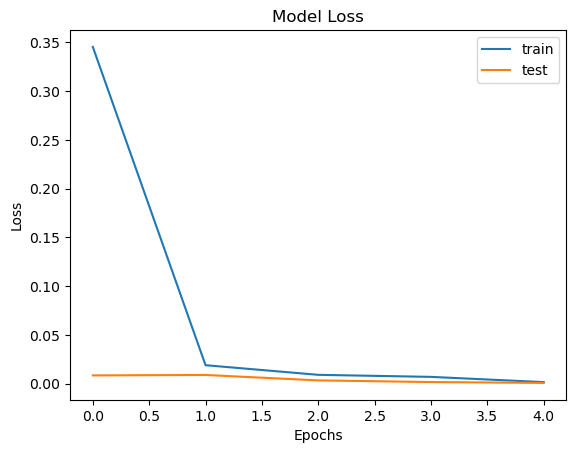

In [26]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

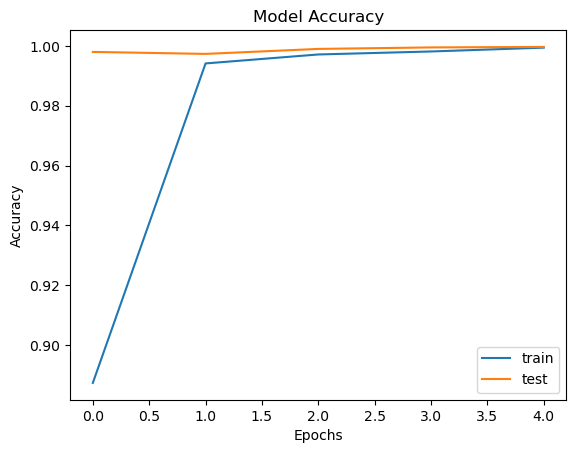

In [27]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [28]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print('Test accuracy: {:2.2f}%'.format(test_accuracy*100))

188/188 [==============================] - 7s 36ms/step - loss: 8.7103e-04 - accuracy: 0.9997
Test accuracy: 99.97%


## Confusion Matrix

188/188 [==============================] - 6s 31ms/step


[]

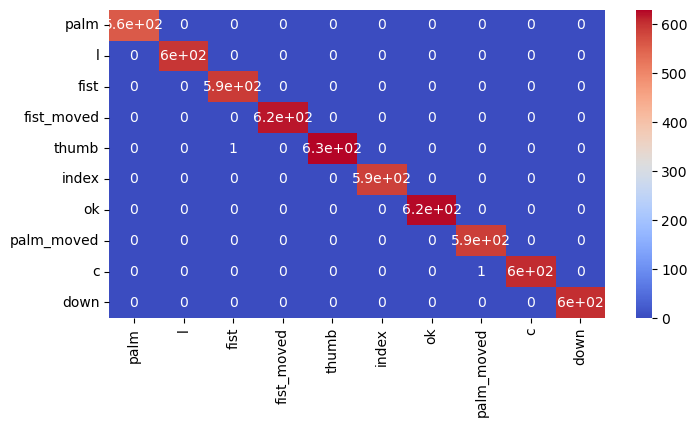

In [32]:
cat = [c[3:] for c in CATEGORIES]
plt.figure(figsize=(8,4))
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(model.predict(X_test), axis=1))
sns.heatmap(cm, annot=True, cmap='coolwarm' ,xticklabels=cat, yticklabels=cat)
plt.plot()